# Following is a demo on the comparison of classifiers in the prescence of high dimensional gaussion noise

## Experiment Specifications

The following is modified from scikit learn's example on classifier comparison. 
Three synthetic datasets are created using the inbuilt functions from scikit learn - make_classification, make_moons and make circles as per the original demo.\
Each input dataset is configured to have 100 samples and 2 dimensions(features) initially.\
During the experiment, we sample gaussion noise of variance values = 0.1, 1, 10 spanning additional noise dimensions from 5 to 1500 in number.\
Each noise dimension of a particular variance value is sampled and concatenated to the sampled input dataset. \
Post this, the data in addition to the noise dimension is split into training and testing data and the three classifiers- Support Vector Machines, Random Forest and KNN are fitted to the data.
We compare the accuracies across SVM, RF and KNN with respect to the number of noise dimensions through a plot of "Accuracy Vs. Noise Dimensions"\
We expect to see Random Forest outperform SVM and KNN in the presence of high variance - high dimensional noise.


In [2]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

In [3]:
#initialize the classifiers
names = ["SVM", "Random Forest", "KNN" ]
classifiers = [
          svm.SVC(kernel='linear'), 
          RandomForestClassifier(n_estimators=50, random_state=1, max_features = 'sqrt'),
          KNeighborsClassifier(n_neighbors=3)]

In [4]:
#function to calculate the accuracy 
def fit_predict(train_data, test_data, train_label , test_label):
    accuracies = []
    for name, model in zip(names, classifiers):
        
        model.fit(train_data, train_label)
        score = model.score(test_data, test_label)
        accuracies.append(score)
    
    SVM_acc = accuracies[0]
    RF_acc = accuracies[1]
    KNN_acc = accuracies[2]

    return SVM_acc,RF_acc,KNN_acc

In [5]:
#function for taking input data, sampling noise and appending it
def add_noise(data, mu, var, dim):
    n = data.shape[0]
    noise = np.random.normal(mu, var, size = [n, dim])
    data = np.concatenate([data,noise],axis = 1)
    return data

In [28]:
#Function to split the data into training & testing and then calculate the accuracies respectively
def split_accuracy(train_data, train_label, size):
    X_train, X_test, y_train, y_test = train_test_split(train_data, train_label, test_size=size)
    svm_acc, rf_acc, knn_acc = fit_predict(X_train, X_test, y_train, y_test)
    return svm_acc, rf_acc, knn_acc

In [43]:
#Function to plot the 3 different classifier accuracies with respect to the number of noise dimensions.
def plotting(x, acc1, acc2, acc3,ax):
    ax.plot(x, acc1, color = 'blue', linewidth = 2, marker='o', label="SVM")
    ax.plot(x, acc2, color ='red', linewidth = 2, marker='o', label="RF")
    ax.plot(x, acc3, color = 'green', linewidth = 2, marker='o', label="KNN")
    #ax.set_xscale('log')

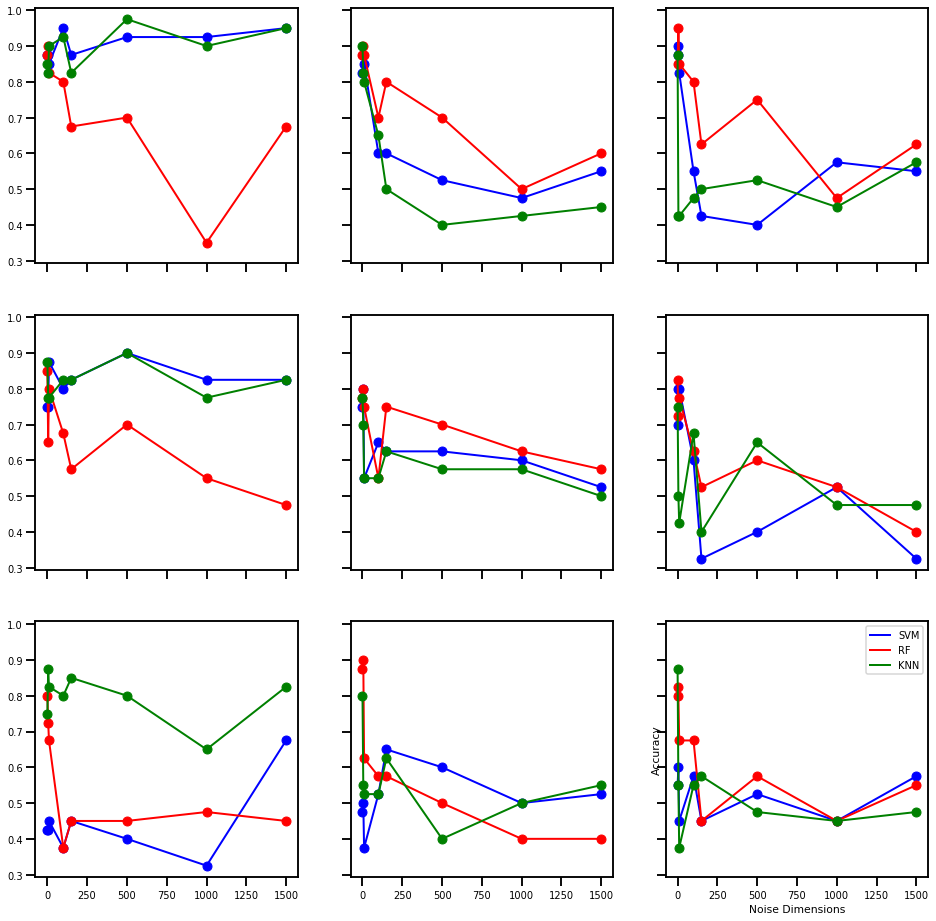

In [51]:
import seaborn as sns
sns.set_context("talk", font_scale=0.6)

class dataset:
    
    def __init__(self):
        self.x = None
        self.y = None
        self.noise = [None] * 3
        self.s = []
        self.r = []
        self.k = []
        
        for i in range(3):
            self.s.append([j for j in range(len(noise_dims))])
            self.r.append([j for j in range(len(noise_dims))])
            self.k.append([j for j in range(len(noise_dims))])
        
scaler = preprocessing.StandardScaler()
noise_dims = [0,5,10,100,150,500,1000,1500]
var_val = [0.1, 1, 10]
split = 0.4

fig, axes = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(16,16))
lines = [Line2D([0], [0], color='blue', lw=2), Line2D([0], [0], color='red', lw=2), Line2D([0], [0], color='green', lw=2)]


for k in range(1):
    ds = [ dataset() for n in range(3) ]

    for d in range(len(noise_dims)):
        
        ds[0].x, ds[0].y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1)
        rng = np.random.RandomState(2)
        ds[0].x += 2 * rng.uniform(size=ds[0].x.shape)
            
        ds[1].x, ds[1].y = make_moons(noise=0.3)
        
        ds[2].x, ds[2].y = make_circles(noise=0.2, factor=0.5)
        
        
        for i in range(3):
            ds[i].x = scaler.fit_transform(ds[i].x)
            
            for j in range(3):
                sa, ra, ka = split_accuracy(add_noise(ds[i].x, 0, var_val[j], noise_dims[d]), ds[i].y, split)
                ds[i].s[j][d] = sa
                ds[i].r[j][d] = ra
                ds[i].k[j][d] = ka
                
                
                
    for i in range(3):
        for j in range(3):
            plotting(noise_dims, ds[i].s[j], ds[i].r[j], ds[i].k[j], axes[i][j])
            
axes[2][2].set_xlabel("Noise Dimensions")
axes[2][2].set_ylabel("Accuracy")
axes[2][2].legend(lines, ['SVM', 'RF', 'KNN'])


